In [1]:
from z3 import *

In [2]:
s = Solver() # create a solver s

In [3]:
import networkx as nx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import networkx.algorithms.isomorphism as iso

In [6]:
G = nx.Graph()

In [7]:
G= nx.read_adjlist("tomita.adjlist",nodetype=int)

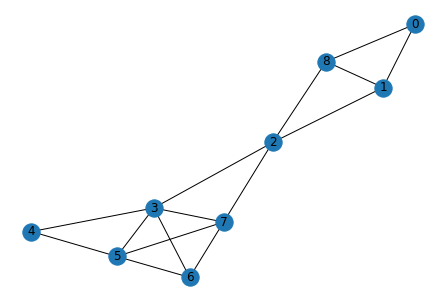

In [8]:
nx.draw(G,with_labels = True)

In [9]:
nn=G.number_of_nodes()

In [10]:
le=list(G.edges)

In [11]:
A=[G.adj[i] for i in range(nn)]

In [12]:
N=[list(i) for i in A]

In [13]:
ln=list(G.nodes)

In [14]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [15]:
complement=[ Diff(ln,e)for e in N]

In [16]:
spec2=[BitVec('V'+str(j+1), nn+3) for j in range(nn)]# for Tomita graph  change  nn
#           by nn+3 to be statisfied 

In [17]:
spec2

[V1, V2, V3, V4, V5, V6, V7, V8, V9]

In [18]:
for j in range(nn):
    p=2**j
    s.add(spec2[j]&p==p)

In [19]:
for i in range(nn):
    for j in N[i]:
        if i >j :
            s.add(spec2[j]&spec2[i]==0)
    

In [20]:
for i in range(nn):
    for j in complement[i]:
        if i >j :
            s.add(spec2[j]&spec2[i]!=0)

In [21]:
for i in range(nn):
    for j in range(nn):
        if i !=j :
            s.add(spec2[j]!=spec2[i])
    

In [22]:
s

[V1 & 1 == 1,
 V2 & 2 == 2,
 V3 & 4 == 4,
 V4 & 8 == 8,
 V5 & 16 == 16,
 V6 & 32 == 32,
 V7 & 64 == 64,
 V8 & 128 == 128,
 V9 & 256 == 256,
 V1 & V2 == 0,
 V2 & V3 == 0,
 V3 & V4 == 0,
 V4 & V5 == 0,
 V4 & V6 == 0,
 V5 & V6 == 0,
 V4 & V7 == 0,
 V6 & V7 == 0,
 V3 & V8 == 0,
 V4 & V8 == 0,
 V6 & V8 == 0,
 V7 & V8 == 0,
 V1 & V9 == 0,
 V2 & V9 == 0,
 V3 & V9 == 0,
 V1 & V3 != 0,
 V1 & V4 != 0,
 V2 & V4 != 0,
 V1 & V5 != 0,
 V2 & V5 != 0,
 V3 & V5 != 0,
 V1 & V6 != 0,
 V2 & V6 != 0,
 V3 & V6 != 0,
 V1 & V7 != 0,
 V2 & V7 != 0,
 V3 & V7 != 0,
 V5 & V7 != 0,
 V1 & V8 != 0,
 V2 & V8 != 0,
 V5 & V8 != 0,
 V4 & V9 != 0,
 V5 & V9 != 0,
 V6 & V9 != 0,
 V7 & V9 != 0,
 V8 & V9 != 0,
 V2 != V1,
 V3 != V1,
 V4 != V1,
 V5 != V1,
 V6 != V1,
 V7 != V1,
 V8 != V1,
 V9 != V1,
 V1 != V2,
 V3 != V2,
 V4 != V2,
 V5 != V2,
 V6 != V2,
 V7 != V2,
 V8 != V2,
 V9 != V2,
 V1 != V3,
 V2 != V3,
 V4 != V3,
 V5 != V3,
 V6 != V3,
 V7 != V3,
 V8 != V3,
 V9 != V3,
 V1 != V4,
 V2 != V4,
 V3 != V4,
 V5 != V4,
 V6 != V4,
 V7 != V4,
 V8 != V4,
 V9 != V4,
 V1 != V5,
 V2 != V5,
 V3 != V5,
 V4 != V5,
 V6 != V5,
 V7 != V5,
 V8 != V5,
 V9 != V5,
 V1 != V6,
 V2 != V6,
 V3 != V6,
 V4 != V6,
 V5 != V6,
 V7 != V6,
 V8 != V6,
 V9 != V6,
 V1 != V7,
 V2 != V7,
 V3 != V7,
 V4 != V7,
 V5 != V7,
 V6 != V7,
 V8 != V7,
 V9 != V7,
 V1 != V8,
 V2 != V8,
 V3 != V8,
 V4 != V8,
 V5 != V8,
 V6 != V8,
 V7 != V8,
 V9 != V8,
 V1 != V9,
 V2 != V9,
 V3 != V9,
 V4 != V9,
 V5 != V9,
 V6 != V9,
 V7 != V9,
 V8 != V9]

In [23]:
s.check()

sat

In [24]:
m=s.model()

In [25]:
len(m)

9

In [26]:
m

[V5 = 532,
 V3 = 36,
 V6 = 290,
 V8 = 656,
 V7 = 1092,
 V9 = 2384,
 V1 = 165,
 V2 = 1546,
 V4 = 2057]

In [29]:
coding=[]

for i in range(len(m)):
     coding.append(0)

for i in range(len(m)):
    coding[i]=str(m[spec2[i]])

In [30]:
coding

['165', '1546', '36', '2057', '532', '290', '1092', '656', '2384']

In [31]:
import pickle

# define a list of places
placesList = coding

with open('coding.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(placesList, filehandle)

In [32]:
import pickle

with open('coding.data', 'rb') as filehandle:
    # read the data as binary data stream
    placesList2 = pickle.load(filehandle)

In [33]:
l=[]
for i in range(len(coding)):
    l.append(int(placesList2[i]))


In [35]:
print("Kneser representation for G is :")
print(l)

Kneser representation for G is :
[165, 1546, 36, 2057, 532, 290, 1092, 656, 2384]
